In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
np.random.seed(seed = 1)
x = 50+100*np.random.rand(40,1)
print(x.transpose())

[[ 91.70220047 122.03244934  50.01143748  80.23325726  64.67558908
   59.23385948  68.62602114  84.5560727   89.67674742 103.8816734
   91.91945144 118.52195004  70.44522497 137.81174364  52.73875932
  117.04675102  91.73048024 105.86898284  64.03869386  69.81014891
  130.07445687 146.82615757  81.34241782 119.23226157 137.63891523
  139.46066635  58.50442114  53.90547832  66.98304196 137.81425034
   59.83468338  92.1107625  145.78895302 103.3165285  119.1877114
   81.5515631  118.65009277 133.46256719  51.82882773 125.01443149]]


Text(0.5, 0, 'Living Area (Meter square)')

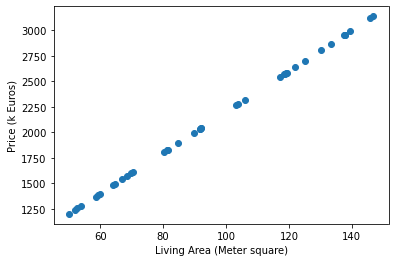

In [3]:
y_gt = 20 * x + 200
plt.figure(1)
plt.scatter(x,y_gt)
plt.ylabel('Price (k Euros)')
plt.xlabel('Living Area (Meter square)')

[[988.86108891 748.16565438 280.44399206 789.27932845 103.22600658
  447.89352618 908.59550309 293.61414837 287.77533859 130.02857212
   19.36695787 678.83553294 211.628116   265.54665937 491.57315928
   53.36254512 574.11760549 146.72857491 589.3055369  699.75836002
  102.33442883 414.05598782 694.40015773 414.17926953  49.95345895
  535.89640592 663.79464522 514.88911206 944.59475599 586.5550405
  903.40191529 137.47470415 139.27634725 807.39128871 397.67683699
  165.35419712 927.5085804  347.76585975 750.81210314 725.99798535]]


Text(0.5, 0, 'Living Area (Meter square)')

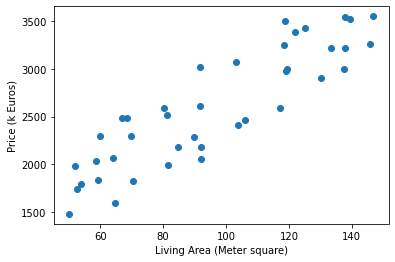

In [4]:
noise  = 1000*np.random.rand(40, 1)
print(noise.transpose())
# remember y = mx+b+e
y = y_gt + noise

plt.figure(2)
plt.scatter(x, y)
plt.ylabel('Price (k Euros)')
plt.xlabel('Living Area (Meter square)')

In [5]:
# train-test split
x_train = x[:30]
y_train = y[:30]
x_val = x[30:35]
y_val = y[30:35]
x_test = x[35:40]
y_test = y[35:40]

In [6]:
# now we will fit a line based on our analytical solution
# y_hat = mx+b
regr_intercpt = linear_model.LinearRegression(fit_intercept = False)
regr_intercpt.fit(x_train, y_train)
m_intercpt = regr_intercpt.coef_
b_intercpt = regr_intercpt.intercept_
print("Coefficient(s) \n", m_intercpt)
print("Bias term: \n", b_intercpt)


Coefficient(s) 
 [[26.12183155]]
Bias term: 
 0.0


[ 0.          5.55682639 11.11365277 16.67047916 22.22730555 27.78413193
 33.34095832 38.89778471 44.45461109 50.01143748]


(0.0, 4027.1365636176897)

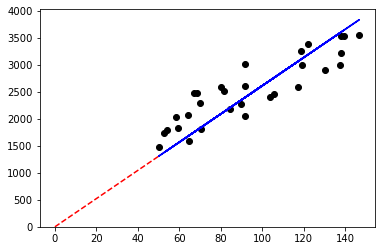

In [7]:
y_pred_train = m_intercpt*x_train+b_intercpt
x_train_ext = np.linspace(0,np.min(x_train),10).transpose()
y_train_ext_pred_intercpt = (m_intercpt*x_train_ext+b_intercpt).transpose()
print(x_train_ext)
plt.figure(3)
plt.plot(x_train, y_train, 'o', color='black')
plt.plot(x_train,y_pred_train,color='blue')
plt.plot(x_train_ext, y_train_ext_pred_intercpt, 'r--')
plt.ylim(ymin=0)

In [8]:
# let's fix the intercept problem
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
m = regr.coef_
b = regr.intercept_
print("Coefficient(s) \n", m)
print("Bias term: \n", b)


Coefficient(s) 
 [[17.68355707]]
Bias term: 
 [870.98313936]


[ 0.          5.55682639 11.11365277 16.67047916 22.22730555 27.78413193
 33.34095832 38.89778471 44.45461109 50.01143748]


(0.0, 3684.558939253183)

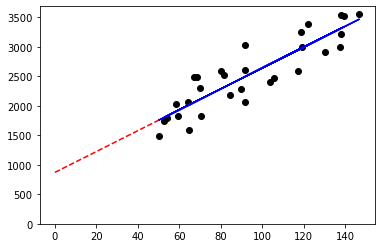

In [9]:
y_pred_train = m*x_train+b
x_train_ext = np.linspace(0,np.min(x_train),10).transpose()
y_train_ext_pred = (m*x_train_ext+b).transpose()
print(x_train_ext)
plt.figure(4)
plt.plot(x_train, y_train, 'o', color='black')
plt.plot(x_train,y_pred_train,color='blue')
plt.plot(x_train_ext, y_train_ext_pred, 'r--')
plt.ylim(ymin=0)

In [10]:
y_pred_train_intercpt = regr_intercpt.predict(x_train)
y_pred_val_intercpt = regr_intercpt.predict(x_val) 
y_pred_test_intercpt = regr_intercpt.predict(x_test)

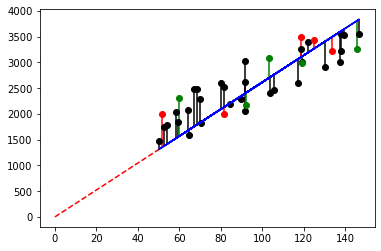

In [11]:
plt.figure(5)
# plot points
plt.plot(x_train, y_train, 'o', color='black')
plt.plot(x_val, y_val, 'o', color='green')
plt.plot(x_test, y_test, 'o', color='red')
# plot fitted line
plt.plot(x_train,y_pred_train_intercpt,color='blue')
plt.plot(x_train_ext, y_train_ext_pred_intercpt, 'r--')
# plot residual lines
plt.vlines(x_train, y_train, y_pred_train_intercpt, colors='k')
plt.vlines(x_val, y_val, y_pred_val_intercpt, colors='g')
plt.vlines(x_test, y_test, y_pred_test_intercpt, colors='r')
plt.show()

In [12]:
y_pred_train = regr.predict(x_train)
y_pred_val = regr.predict(x_val) 
y_pred_test = regr.predict(x_test)

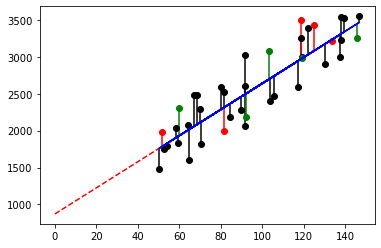

In [13]:
plt.figure(3)
# plot points
plt.plot(x_train, y_train, 'o', color='black')
plt.plot(x_val, y_val, 'o', color='green')
plt.plot(x_test, y_test, 'o', color='red')
# plot fitted line
plt.plot(x_train,y_pred_train,color='blue')
plt.plot(x_train_ext, y_train_ext_pred, 'r--')
# plot residual lines
plt.vlines(x_train, y_train, y_pred_train, colors='k')
plt.vlines(x_val, y_val, y_pred_val, colors='g')
plt.vlines(x_test, y_test, y_pred_test, colors='r')
plt.show()

In [14]:

# mae error train
err_train = np.sum(np.abs(y_pred_train_intercpt-y_train))/y_train.shape[0]
print("MSE on training samples for intercept zero: ", err_train)

# mae error val

err_val = np.sum(np.abs(y_pred_val_intercpt-y_val))/y_val.shape[0]
print("MSE on validation samples for intercept zero: ", err_val)

# mae error test

err_test = np.sum(np.abs(y_pred_test_intercpt-y_test))/y_test.shape[0]
print("MSE on test samples for intercept zero: ", err_test)


MSE on training samples for intercept zero:  325.06823119208707
MSE on validation samples for intercept zero:  404.7220312526995
MSE on test samples for intercept zero:  319.7036746256985


In [15]:

# mae error train
err_train = np.sum(np.abs(y_pred_train-y_train))/y_train.shape[0]
print("MSE on training samples: ", err_train)

# mae error val

err_val = np.sum(np.abs(y_pred_val-y_val))/y_val.shape[0]
print("MSE on validation samples: ", err_val)

# mae error test

err_test = np.sum(np.abs(y_pred_test-y_test))/y_test.shape[0]
print("MSE on test samples: ", err_test)

MSE on training samples:  236.0251446744655
MSE on validation samples:  252.73534780306312
MSE on test samples:  281.3281994167285
